**Import Python Packages and Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

**Importing The Data Using Pandas**

In [3]:
uber = pd.read_csv('uber.csv')

**About The Data**

In [4]:
uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
uber.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
uber.corr()['fare_amount'].sort_values()

dropoff_latitude    -0.011014
pickup_latitude     -0.008481
Unnamed: 0           0.000589
dropoff_longitude    0.008986
passenger_count      0.010150
pickup_longitude     0.010457
fare_amount          1.000000
Name: fare_amount, dtype: float64

**Data Cleaning And Feature Engineering**

In [8]:
uber.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

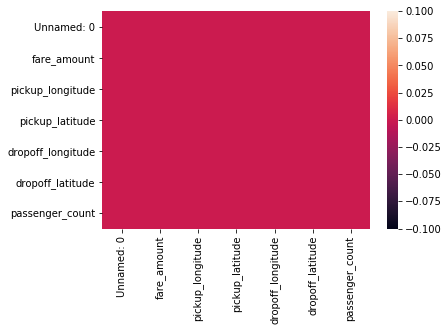

In [9]:
sns.heatmap(uber.corr().isnull())

In [10]:
uber.dropna(inplace=True)
uber.drop(['Unnamed: 0'],inplace=True,axis=1)
uber.drop(uber[uber['pickup_longitude']== 0].index, inplace=True)
uber.drop(uber[uber['pickup_latitude']== 0].index, inplace=True)
uber.drop(uber[uber['dropoff_longitude']== 0].index, inplace=True)
uber.drop(uber[uber['dropoff_latitude']== 0].index, inplace=True)

In [11]:
uber.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


**Import Radians,Cos,Sin,Asin and Square Root From The Math Library**

In [12]:
from math import radians, cos, sin, asin, sqrt

**Using The Haversine Function To Calculate distances Between Two Points**

In [13]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [14]:
haversine(-73.9881286621093,40.7320289611816,-73.9901733398437,40.7566795349121)

2.746425820751647

In [15]:
uber['Distance'] = uber.apply(lambda row: haversine(row['pickup_longitude'],row['pickup_latitude'],
                             row['dropoff_longitude'],row['dropoff_latitude']), axis=1)

In [16]:
uber['Distance']

0          1.683323
1          2.457590
2          5.036377
3          1.661683
4          4.475450
            ...    
199995     0.112210
199996     1.875050
199997    12.850319
199998     3.539715
199999     5.417783
Name: Distance, Length: 196031, dtype: float64

In [17]:
uber.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


**Exploratory Data Analysis**

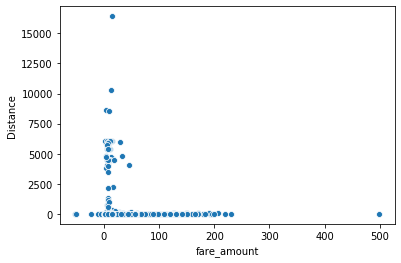

In [18]:
sns.scatterplot(uber['fare_amount'],uber['Distance'],data=uber)

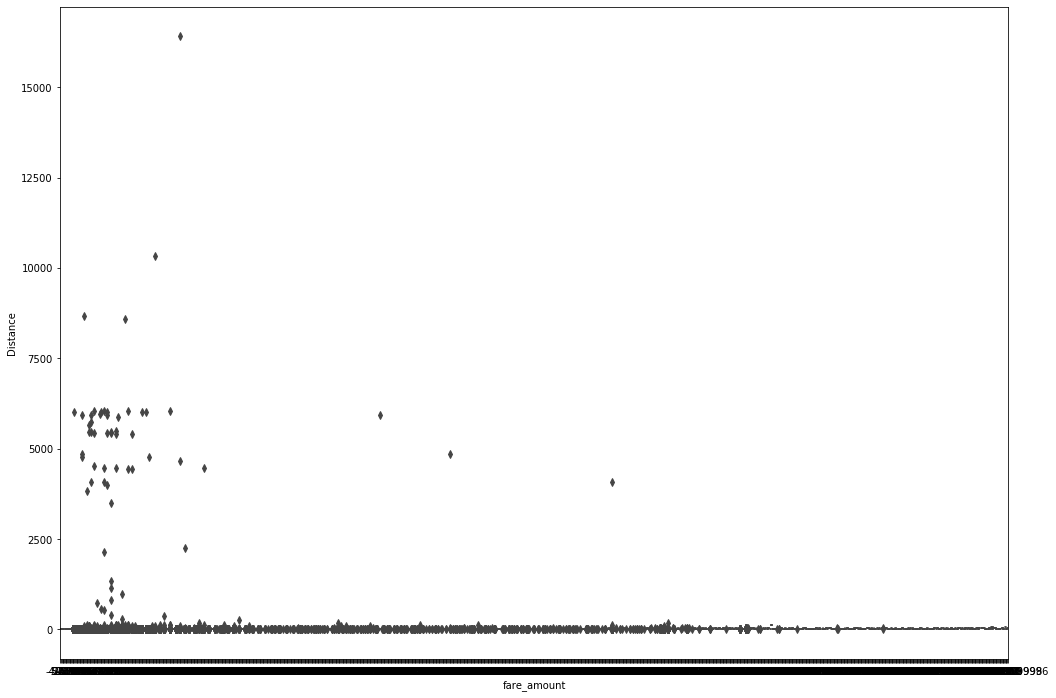

In [19]:
plt.figure(figsize=(17,12))
sns.boxplot(uber['fare_amount'],uber['Distance'],data=uber)

In [20]:
uber[uber['Distance'] == 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
5,2011-02-12 02:27:09.0000006,4.90,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1,0.0
48,2013-01-03 22:24:41.0000002,56.80,2013-01-03 22:24:41 UTC,-73.993498,40.764686,-73.993498,40.764686,1,0.0
84,2009-08-07 10:43:07.0000001,49.57,2009-08-07 10:43:07 UTC,-73.975058,40.788820,-73.975058,40.788820,1,0.0
166,2014-01-22 21:01:18.0000004,4.50,2014-01-22 21:01:18 UTC,-73.992937,40.757780,-73.992937,40.757780,1,0.0
361,2009-08-24 17:25:00.00000056,10.10,2009-08-24 17:25:00 UTC,-73.928705,40.753475,-73.928705,40.753475,1,0.0
...,...,...,...,...,...,...,...,...,...
199448,2010-07-24 21:16:00.00000062,5.70,2010-07-24 21:16:00 UTC,-73.924907,40.745833,-73.924907,40.745833,3,0.0
199612,2013-02-17 11:27:00.00000040,4.50,2013-02-17 11:27:00 UTC,-73.969717,40.765832,-73.969717,40.765832,3,0.0
199647,2009-06-07 02:07:26.0000001,2.50,2009-06-07 02:07:26 UTC,-73.956623,40.771633,-73.956623,40.771633,1,0.0
199917,2013-06-24 22:17:43.0000002,4.50,2013-06-24 22:17:43 UTC,-73.793768,40.656939,-73.793768,40.656939,1,0.0


In [21]:
uber[uber['Distance'] > 100]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
1945,2013-02-10 16:18:00.00000013,7.0,2013-02-10 16:18:00 UTC,-0.131667,40.757063,-73.991593,40.749953,1,6021.114289
2167,2012-07-21 12:16:00.000000127,5.7,2012-07-21 12:16:00 UTC,-1.216667,40.748597,-74.004822,40.734670,1,5941.059801
4949,2012-04-28 00:58:00.000000235,4.9,2012-04-28 00:58:00 UTC,-748.016667,40.739957,-74.003570,40.734192,1,3828.760217
6594,2012-06-05 19:05:00.00000042,9.3,2012-06-05 19:05:00 UTC,-1.866667,40.765987,-73.972280,40.793807,1,5885.528611
11880,2012-02-26 00:01:00.000000145,14.9,2012-02-26 00:01:00 UTC,-0.007712,40.725602,-73.967487,40.766410,5,6029.400744
...,...,...,...,...,...,...,...,...,...
190768,2011-10-08 09:25:00.00000068,5.7,2011-10-08 09:25:00 UTC,-73.978315,40.748417,-3.975457,40.757267,1,5727.572530
197483,2011-05-09 13:41:53.0000002,49.8,2011-05-09 13:41:53 UTC,-75.342288,40.646767,-73.976186,39.615770,1,163.187094
199403,2013-01-20 17:58:29.0000001,7.0,2013-01-20 17:58:29 UTC,-67.370360,39.999790,-73.971058,40.753000,1,565.234582
199641,2012-06-22 12:36:00.00000060,8.1,2012-06-22 12:36:00 UTC,-74.000143,40.742877,-7.995197,40.759382,5,5419.533753


In [22]:
uber.drop(uber[uber['Distance'] == 0].index, inplace = True)
uber.drop(uber[uber['Distance'] > 100].index, inplace = True)

In [23]:
uber.drop(uber[uber['fare_amount'] > 100].index, inplace = True)
uber.drop(uber[uber['Distance'] < -1].index, inplace = True)

In [24]:
uber.tail(4)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
199996,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715
199999,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1,5.417783


In [25]:
uber['pickup_datetime'] = pd.to_datetime(uber['pickup_datetime'])

In [26]:
uber['Year'] = uber['pickup_datetime'].apply(lambda time: time.year)
uber['Month'] = uber['pickup_datetime'].apply(lambda time: time.month)
uber['Date'] = uber['pickup_datetime'].apply(lambda time: time.day)
uber['Hour'] = uber['pickup_datetime'].apply(lambda time: time.hour)
uber['Day of Week'] = uber['pickup_datetime'].apply(lambda time: time.dayofweek)
uber['Counter'] = 1

In [27]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed',3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
uber['Day of Week'] = uber['Day of Week'].map(dmap)

In [28]:
uber['key'] = uber['key'].str.split('.').str[-1]

In [29]:
uber['pick_up'] = uber['pickup_latitude'].astype(str) + "," + uber['pickup_longitude'].astype(str)
uber['drop_off'] = uber['dropoff_latitude'].astype(str) + "," + uber['dropoff_longitude'].astype(str)

In [30]:
uber.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance,Year,Month,Date,Hour,Day of Week,Counter,pick_up,drop_off
0,0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,5,7,19,Thur,1,"40.73835372924805,-73.99981689453125","40.72321701049805,-73.99951171875"
1,0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,7,17,20,Fri,1,"40.728225,-73.994355","40.750325,-73.99471"
2,00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,8,24,21,Mon,1,"40.74077,-74.005043","40.772647,-73.962565"
3,0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,6,26,8,Fri,1,"40.790844,-73.976124","40.803349,-73.965316"
4,000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,8,28,17,Thur,1,"40.744085,-73.925023","40.761247,-73.97308199999998"


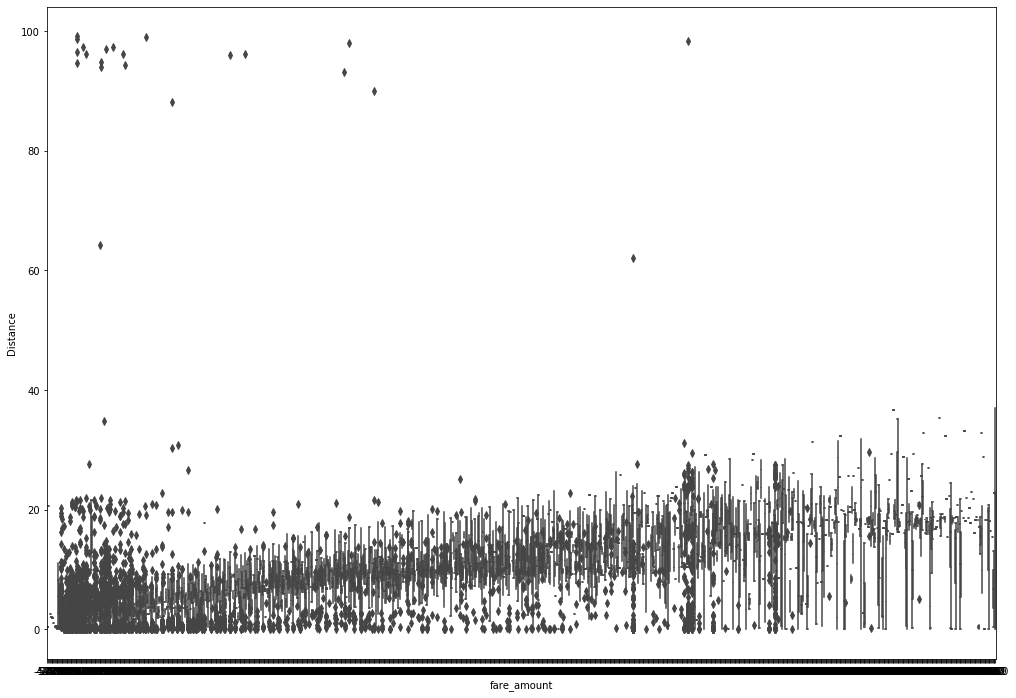

In [31]:
plt.figure(figsize=(17,12))
sns.boxplot(uber['fare_amount'],uber['Distance'],data=uber)

In [32]:
trips_per_month = uber.groupby(['Year','Month']).agg(total_trips=('Counter','count')).reset_index()

In [33]:
print(round(trips_per_month['total_trips'].mean()))

2485


In [34]:
trips_per_day = uber.groupby(['Year','Month','Date']).agg(total_trips=('Counter','count')).reset_index()

In [35]:
print(round(trips_per_day['total_trips'].mean()))

82


In [36]:
number_of_rides = uber.groupby(['Year','Month','Date','Day of Week']).agg(total_trips=('Counter','count'),
                                                                         average_amount=('fare_amount','mean'),
                                                                         total_fare=('fare_amount','sum')).reset_index()


In [37]:
Top_rides = number_of_rides.sort_values('total_trips',ascending=False).head(10)

In [38]:
Top_rides

,Year,Month,Date,Day of Week,total_trips,average_amount,total_fare
344,2009,12,11,Fri,127,10.089606,1281.38
846,2011,4,27,Wed,122,10.147541,1238.00
295,2009,10,23,Fri,121,8.875124,1073.89
888,2011,6,8,Wed,121,12.251240,1482.40
751,2011,1,22,Sat,120,9.355000,1122.60
393,2010,1,29,Fri,119,9.186639,1093.21
470,2010,4,16,Fri,119,10.398655,1237.44
225,2009,8,14,Fri,118,10.692797,1261.75
1177,2012,3,23,Fri,118,10.375424,1224.30
1430,2012,12,1,Sat,117,11.383761,1331.90


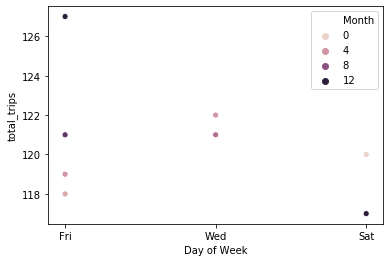

In [39]:
sns.scatterplot(Top_rides['Day of Week'],Top_rides['total_trips'], data=Top_rides,hue='Month')

In [40]:
Low_rides = number_of_rides.sort_values('total_trips',ascending=False).tail(10)

In [41]:
Low_rides

,Year,Month,Date,Day of Week,total_trips,average_amount,total_fare
640,2010,10,3,Sun,32,10.773125,344.74
397,2010,2,2,Tue,31,8.828065,273.67
424,2010,3,1,Mon,30,8.532333,255.97
396,2010,2,1,Mon,28,8.470357,237.17
730,2011,1,1,Sat,27,9.907407,267.50
2184,2014,12,25,Thur,25,13.960000,349.00
2217,2015,1,27,Tue,22,11.113636,244.50
1397,2012,10,29,Mon,21,11.380952,239.00
725,2010,12,27,Mon,13,16.469231,214.10
969,2011,8,28,Sun,7,8.385714,58.70


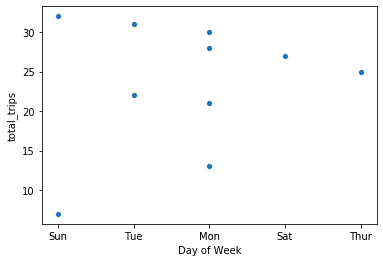

In [42]:
sns.scatterplot(Low_rides['Day of Week'],Low_rides['total_trips'], data=Low_rides)

**Import Cufflinks**

In [43]:
import cufflinks as cf

In [44]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [45]:
init_notebook_mode(connected=True)

In [46]:
cf.go_offline()

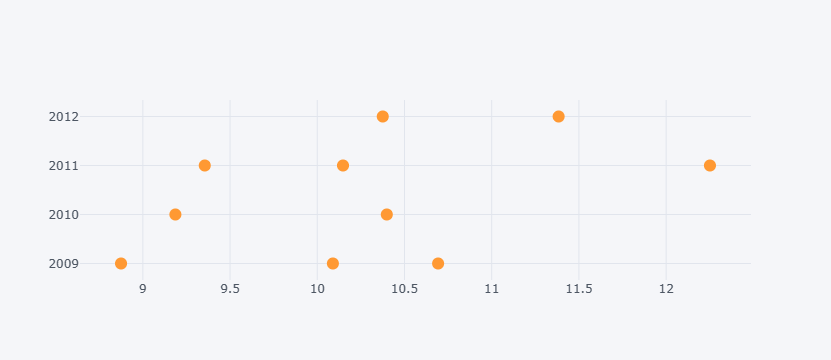

In [47]:
Top_rides.iplot(kind='scatter',x='average_amount',y='Year',mode='markers')

In [48]:
trips_per_time = uber.groupby(['Year','Month']).agg(total_trips=('Counter','count'),
                                                    average_amount=('fare_amount','mean'),
                                                    total_fare=('fare_amount','sum'),
                                                    average_distance=('Distance','mean')).reset_index()

trips_per_time['average_num_of_trips'] = trips_per_time['total_trips']/30
trips_per_time['Month/Year'] = trips_per_time['Month'].astype(str) + "," + trips_per_time['Year'].astype(str)

In [49]:
trips_per_time = trips_per_time.reset_index()

In [50]:
trips_per_time.head()

,index,Year,Month,total_trips,average_amount,total_fare,average_distance,average_num_of_trips,Month/Year
0,0,2009,1,2477,9.546407,23646.45,3.108790,82.566667,"1,2009"
1,1,2009,2,2243,9.663754,21675.80,3.085558,74.766667,"2,2009"
2,2,2009,3,2642,10.140992,26792.50,3.235642,88.066667,"3,2009"
3,3,2009,4,2507,10.040846,25172.40,3.291560,83.566667,"4,2009"
4,4,2009,5,2594,10.017656,25985.80,3.296771,86.466667,"5,2009"


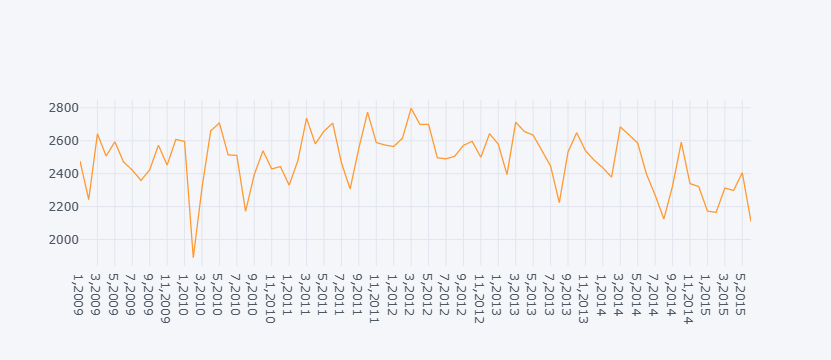

In [51]:
trips_per_time.iplot(kind='scatter',x='Month/Year',y='total_trips')

In [52]:
ubercorr = trips_per_time[['total_trips','average_amount','average_distance']]

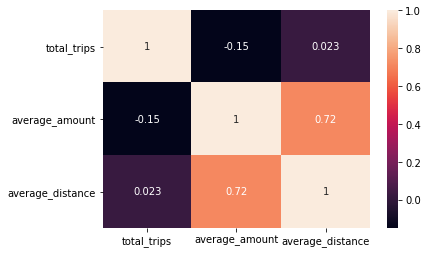

In [53]:
sns.heatmap(ubercorr.corr(),annot=True)

In [54]:
ubercorr

,total_trips,average_amount,average_distance
0,2477,9.546407,3.108790
1,2243,9.663754,3.085558
2,2642,10.140992,3.235642
3,2507,10.040846,3.291560
4,2594,10.017656,3.296771
...,...,...,...
73,2165,12.650092,3.302156
74,2313,12.870839,3.407621
75,2298,12.798329,3.389966
76,2406,13.473749,3.594680


**Import train_test_split using scikit learn Model Selection**

In [55]:
from sklearn.model_selection import train_test_split

**Attaching Values to X and Y Variables**

In [56]:
X = ubercorr.drop('average_amount',axis=1)
y = ubercorr['average_amount']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Import RandomForestRegressor Using Scikit Learn Ensemble**

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rtr = RandomForestRegressor(max_depth=2)

In [60]:
rtr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [61]:
predp = rtr.predict(X_test)

In [62]:
predp

array([10.17002505, 10.47544664, 11.32120034, 11.01594315, 10.47770305,
       10.01678622, 12.01717133, 11.27542414, 10.38934487, 10.49110105,
       10.42088889, 11.22785669, 10.47544664, 12.7948518 , 11.29604109,
       10.38202569, 10.09975917, 12.55537631, 12.0596054 , 11.1731013 ,
       10.5819019 , 10.37109854, 12.55984261, 12.51709589])

**The Score Of The Model Between The Training and Test Data**

In [63]:
print('Training score is:',rtr.score(X_train,y_train),'Test score is:',rtr.score(X_test,y_test))

Training score is: 0.6093692483788156 Test score is: 0.554600748727676
